# Random Forest

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# Set working directory
month_file = '2_June'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

In [2]:
# Load original dataset
dataset = pd.read_parquet('top_vs_ntop_player_ending_balance_by_session.parquet')

print(dataset.columns)

Index(['playerkey', 'session_time', 'gender', 'age_range', 'age_gen', 'day',
       'timeofday', 'beginning_amt', 'ending_amt', 'ending_balance',
       'ave_slotdenom', 'std_slotdenom', 'min_slotdenom', 'max_slotdenom',
       'ave_theo_payback', 'min_theo_payback', 'max_theo_payback',
       'ave_wageramt', 'std_wageramt', 'min_wager', 'max_wager', 'ave_p/b',
       'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', '#inc_maxbet',
       '#dec_maxbet', 'first_wager', 'first_outcome', 'first_p/b',
       'last_wager', 'last_outcome', 'last_p/b', '#W', '#L', '#NH', '#D',
       'w/min', 'l/min', 'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g',
       '#2ws', '2ws_profit', '2ws_wgramt', '#3ws', '3ws_profit', '3ws_wgramt',
       '#4ws', '4ws_profit', '4ws_wgramt', '2ws/min', '3ws/min', '4ws/min',
       'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
       'total_duration', 'total_gambles', 'machines_changes', '#inc_slotdenom',
       '#dec_slotdenom', 'unique_m

## Column Mapping

In [3]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'playerkey', 1: 'session_time', 2: 'gender', 3: 'age_range', 4: 'age_gen', 5: 'day', 6: 'timeofday', 7: 'beginning_amt', 8: 'ending_amt', 9: 'ending_balance', 10: 'ave_slotdenom', 11: 'std_slotdenom', 12: 'min_slotdenom', 13: 'max_slotdenom', 14: 'ave_theo_payback', 15: 'min_theo_payback', 16: 'max_theo_payback', 17: 'ave_wageramt', 18: 'std_wageramt', 19: 'min_wager', 20: 'max_wager', 21: 'ave_p/b', 22: 'std_p/b', 23: 'max_p/b', 24: 'max_profit', 25: 'depletion_slope', 26: '#inc_maxbet', 27: '#dec_maxbet', 28: 'first_wager', 29: 'first_outcome', 30: 'first_p/b', 31: 'last_wager', 32: 'last_outcome', 33: 'last_p/b', 34: '#W', 35: '#L', 36: '#NH', 37: '#D', 38: 'w/min', 39: 'l/min', 40: 'nh/min', 41: 'd/min', 42: 'w/g', 43: 'l/g', 44: 'nh/g', 45: 'd/g', 46: '#2ws', 47: '2ws_profit', 48: '2ws_wgramt', 49: '#3ws', 50: '3ws_profit', 51: '3ws_wgramt', 52: '#4ws', 53: '4ws_profit', 54: '4ws_wgramt', 55: '2ws/min', 56: '3ws/min', 57: '4ws/min', 58: 'ave_time_per_gamble', 59: 'min_time_per

## Load Dataframes

In [4]:
# Filter Columns
filter = ['session_time', 'gender', 'age_gen', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance', 'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', '#W', '#L', '#NH', '#D',
        'w/min', 'l/min', '#2ws', '2ws_profit', '2ws_wgramt','2ws/min', 
        '#3ws', '3ws_profit', '3ws_wgramt', '3ws/min', '#4ws', '4ws_profit', '4ws_wgramt', '4ws/min', 
        'w/g', 'l/g', 'nh/g', 'd/g', 'ave_time_per_gamble', 
        'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine', 'day', 'timeofday', 'classification']


# Load dataset
dataset = pd.read_parquet('top_vs_ntop_player_ending_balance_by_session.parquet', columns=filter)

# Keep only session_time 1
dataset = dataset[dataset['session_time'] == 1]
# Drop age_range and playerkey
dataset = dataset.drop(['session_time'], axis=1)

# Convert 'ave_time_per_machine' to seconds
dataset['ave_time_per_machine'] = dataset['ave_time_per_machine'].dt.total_seconds()

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Taking Care of Missing Data

X[:, 3:31] it covers from beggining account balance to 4ws_wgramt column

We do not need this step since we do not have missing data!

In [5]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(X[:, 3:31])
# X[:, 3:31] = imputer.transform(X[:, 3:31])

## Encoding Categorical Data

### Encoding the Independent Variable

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

In [7]:
# # Encode age_generartion, first_outoce, last_outcome, time of day columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 5, 60])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Encoding the Dependent Variable

In [8]:
y = le.fit_transform(y)

## Splitting the dataset into the Training set and Test set

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 18:73] = sc.fit_transform(X_train[:, 18:73])
X_test[:, 18:73] = sc.transform(X_test[:, 18:73])

## Training the Logistic Regression model on 

1.   X_train
2.   y_train

the Training set

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

### Which IDVs have the most weight in the model

In [12]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x31: 0.02112676056338032
remainder__x56: 0.01126760563380288
remainder__x19: 0.008450704225352167
remainder__x32: 0.008450704225352167
remainder__x34: 0.006103286384976569
remainder__x54: 0.005633802816901468
remainder__x55: 0.005164319248826344
remainder__x12: 0.0046948356807512415
remainder__x28: 0.0046948356807512415
remainder__x35: 0.0042253521126761175
remainder__x10: 0.004225352112676106
remainder__x3: 0.004225352112676095
remainder__x58: 0.004225352112676095
encoder__x60_afternoon: 0.003755868544600993
remainder__x8: 0.003286384976525869
remainder__x16: 0.003286384976525869
remainder__x18: 0.003286384976525869
remainder__x20: 0.003286384976525869
remainder__x22: 0.003286384976525869
remainder__x40: 0.002816901408450734
remainder__x36: 0.0023474178403756207
remainder__x11: 0.0018779342723004965
remainder__x25: 0.0014084507042253724
remainder__x43: 0.0009389671361502483
remainder__x41: 0.00046948356807512414
encoder__x1_Baby Boomers: 0.0
encoder__x1_Gen X: 0.0
encoder__

### Predicting the Test set results

In [13]:
y_pred = classifier.predict(X_test)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]]


### Making the Confusion Matrix and Accuracy Score

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro', zero_division=1))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[48  0]
 [ 3  3]]
Accuracy:  0.9444444444444444
Precision:  0.9705882352941176
Recall:  0.75
F1 Score:  0.8181818181818181


## Cumulative Accuracy Profile (CAP) Graph

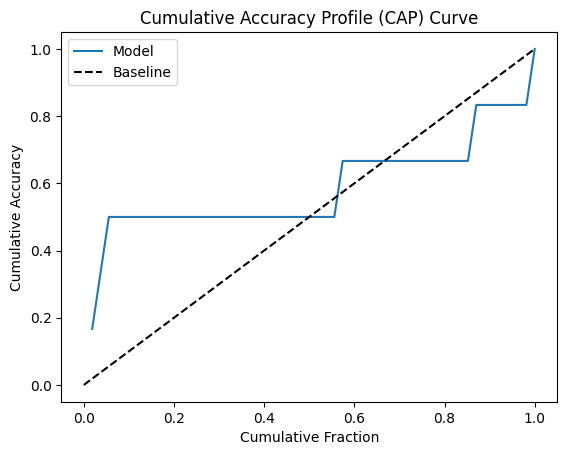

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()